# Data Analytics with Python Group 5 
Miroslav Kapuscinski, Fionna Loughlin, Shahnawaz Parvin

Assignment 2 Model of Energy Demand with Weather

In [4]:
import pandas as pd
import chardet 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

### 1. Data Cleaning, Preporocessing and Visualization

In [11]:
##1. Data Cleaning, Preporocessing and Visualization CODE ONLY, not including visual checks along the way
"""input csv files: weather.csv, price_demand.csv
Code: imports cleans preprocesses and visualizes Energy demand and weather data ready for analysis
Output: 1) dataframe clean: merge_data_final 
Output2 2) final dataframe to be used for analysis: df_all or as csv: Group5_data_final.csv """

#1a Data importing for weather.csv and cleaning into dataframe indexed on Date: weather_dataset2

# identify encoding of weather.csv original
rawdata1 = open("weather.csv", 'rb').read()
result = chardet.detect(rawdata1)
charenc = result['encoding']
print(result)

# Read in csv and load into dataframe
weather_dataset = pd.read_csv("weather.csv", encoding ="ISO-8859-1")
weather_dataset.info()

#DATA CLEANNING :removing empty columns from df_weather.
weather_dataset1 = weather_dataset.dropna(how= "all", axis=1)

# Assuming df_weather1 is your original DataFrame
df_weather_copy = weather_dataset1.copy()

# Changing the format of 'Date' column to dtype: datetime
df_weather_copy['Date'] = pd.to_datetime(df_weather_copy['Date'], format='%d/%m/%Y')
df_weather_copy['Date'] = df_weather_copy['Date'].dt.strftime('%Y-%m-%d')

# Changing DATE column into index
weather_dataset2 = df_weather_copy.set_index('Date')

# Resetting the index to retain 'Date' as a regular column
weather_dataset2 = weather_dataset2.reset_index()

# Check the resulting DataFrame
print(weather_dataset2.info())


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Location                           175 non-null    object 
 1   Date                               175 non-null    object 
 2   Minimum temperature (°C)           175 non-null    float64
 3   Maximum temperature (°C)           174 non-null    float64
 4   Rainfall (mm)                      175 non-null    float64
 5   Evaporation (mm)                   0 non-null      float64
 6   Sunshine (hours)                   0 non-null      float64
 7   Direction of maximum wind gust     174 non-null    object 
 8   Speed of maximum wind gust (km/h)  174 non-null    float64
 9   Time of maximum wind gust          174 non-null    object 
 10  9am Temperature (°C)               175 non-null    float64


In [12]:
#1b Data importing for price_demand.csv to dataframe indexed on Date: df_demandPrice

# identify encoding of proce_demand.csv original
rawdata2 = open("price_and_demand.csv", 'rb').read()
result = chardet.detect(rawdata2)
charenc = result['encoding']
print(result)

# Read in csv and load into dataframe
df_demand_price = pd.read_csv("price_and_demand.csv", encoding ="ascii")


df_demand_price.info()

# Assuming df_demand_price is your original DataFrame
df_demand_copy = df_demand_price.copy()
df_demand_copy['SETTLEMENTDATE'] = pd.to_datetime(df_demand_copy['SETTLEMENTDATE'], format='%d/%m/%Y %H:%M')
df_demand_copy['Date'] = df_demand_copy['SETTLEMENTDATE'].dt.strftime('%Y-%m-%d')

# Changing DATE column into index
df_demandPrice = df_demand_copy.set_index('Date')

# Resetting the index to retain 'Date' as a regular column
df_demandPrice = df_demandPrice.reset_index()

# Check the resulting DataFrame
print(df_demandPrice.info())

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8352 entries, 0 to 8351
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          8352 non-null   object 
 1   SETTLEMENTDATE  8352 non-null   object 
 2   TOTALDEMAND     8352 non-null   float64
 3   RRP             8352 non-null   float64
 4   PERIODTYPE      8352 non-null   object 
dtypes: float64(2), object(3)
memory usage: 326.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8352 entries, 0 to 8351
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            8352 non-null   object        
 1   REGION          8352 non-null   object        
 2   SETTLEMENTDATE  8352 non-null   datetime64[ns]
 3   TOTALDEMAND     8352 non-null   float64       
 4   RRP             8352 non-null   float64      

In [13]:
### 1c Data preprocessing - data aggreation and cleaning

### 1c-1 DATA AGGREGATION 

# Calculate the maximum demand per day
max_demand_per_day = df_demandPrice.groupby('Date')['TOTALDEMAND'].max().reset_index()
max_demand_per_day.columns = ['Date', 'DailyMaxDemand']
# Check output
max_demand_per_day.info()

# Calculate the minimum demand per day
min_demand_per_day = df_demandPrice.groupby('Date')['TOTALDEMAND'].min().reset_index()
min_demand_per_day.columns = ['Date', 'DailyMinDemand']
# Check output
min_demand_per_day.info()

# Calculate the total demand per day
average_demand_per_day = df_demandPrice.groupby('Date')['TOTALDEMAND'].mean().reset_index()
average_demand_per_day.columns = ['Date', 'DailyAverageDemand']
# Check output
average_demand_per_day.info()

# Calculate the total demand per day
total_demand_per_day = df_demandPrice.groupby('Date')['TOTALDEMAND'].sum().reset_index()
total_demand_per_day.columns = ['Date', 'DailyTotalDemand']
# Check output
total_demand_per_day.info()

# Calculate the maximum RRP per day # Not used in futher analysis
max_RRP_per_day = df_demandPrice.groupby('Date')['RRP'].max().reset_index()
max_RRP_per_day.columns = ['Date', 'MaxEnergyPrice_Daily']
# Check output
max_RRP_per_day.info()

# Calculate the minimun RRP per day  # Not used in futher analysis
min_RRP_per_day = df_demandPrice.groupby('Date')['RRP'].min().reset_index()
min_RRP_per_day.columns = ['Date', 'MinEnergyPrice_Daily']
# Check output
min_RRP_per_day.info()

# Calculate the average/mean RRP per day # Not used in futher analysis
average_RRP_per_day = df_demandPrice.groupby('Date')['RRP'].mean().reset_index()
average_RRP_per_day.columns = ['Date', 'AverageEnergyPrice_Daily']
# Check output
average_RRP_per_day.info()

# Calculate the average/mean RRP per day # Not used in futher analysis
total_RRP_per_day = df_demandPrice.groupby('Date')['RRP'].sum().reset_index()
total_RRP_per_day.columns = ['Date', 'TotalEnergyPrice_Daily']
# Check output
total_RRP_per_day

# Checking .dtype of all new dataframe/series
print("weather_dataset2['Date']: ", weather_dataset2['Date'].dtype)
print("max_demand_per_day['Date']: ", max_demand_per_day['Date'].dtype)
print("min_demand_per_day['Date']: ", min_demand_per_day['Date'].dtype)
print("average_demand_per_day['Date']: ", average_demand_per_day['Date'].dtype)
print("total_demand_per_day['Date']: ", total_demand_per_day['Date'].dtype)
print("max_RRP_per_day['Date']: ", max_RRP_per_day['Date'].dtype)
print("min_RRP_per_day['Date']: ", min_RRP_per_day['Date'].dtype)
print("average_RRP_per_day['Date']: ", average_RRP_per_day['Date'].dtype)
print("total_RRP_per_day['Date']: ", total_RRP_per_day['Date'].dtype)

# merging data into one dataframe: merged_data_final
# Assuming 'weather_dataset', 'max_demand_per_day', 'min_demand_per_day', 'average_demand_per_day', 'total_demand_per_day' are your DataFrames
merged_dataMaxDemand = pd.merge(weather_dataset2, max_demand_per_day, on='Date', how='left')
merged_dataMinDemand = pd.merge(merged_dataMaxDemand, min_demand_per_day, on='Date', how='left')
merged_dataAverageDemand = pd.merge(merged_dataMinDemand, average_demand_per_day, on='Date', how='left')
merged_dataTotalDemand = pd.merge(merged_dataAverageDemand, total_demand_per_day, on='Date', how='left')
merged_dataMaxRRP = pd.merge(merged_dataTotalDemand, max_RRP_per_day, on='Date', how='left')
merged_dataMinRRP = pd.merge(merged_dataMaxRRP, min_RRP_per_day, on='Date', how='left')
merged_dataAverageRRP = pd.merge(merged_dataMinRRP, average_RRP_per_day, on='Date', how='left')
merged_data_final = pd.merge(merged_dataAverageRRP, total_RRP_per_day, on='Date', how='left')


### 1c -2 DATA CLEANING

## DATA CLEANING - Last row [174] because < 50 % variable entires present
row_to_remove_index = 174  # select the  position of the row you want to remove
merged_data_final = merged_data_final.drop(merged_data_final.index[row_to_remove_index]).reset_index(drop=True)

merged_data_final.info()



## DATA CLEANING -  9 am wind speed

# Specify the column you want to check
column_to_check = '9am wind speed (km/h)' 
# Display unique values in the specified column
unique_values = merged_data_final[column_to_check].unique()
#DATA CLEANNING : Predict Calm value as 10 and replace Calm value to 10 from column 9am wind speed (km/h).
#REFERENCE (https://agriculture.vic.gov.au/farm-management/chemicals/spraying-agricultural-chemicals/managing-spray-drift/a-guide-to-estimating-wind-speed)
merged_data_final['9am wind speed (km/h)'] = merged_data_final['9am wind speed (km/h)'].replace('Calm', 0).astype('float64')

## DATA CLEANING - 9am wind direction 

# Specify the column you want to check
column_to_check1 = '9am wind direction'  # Replace with your actual column name

# Display unique values in the specified column
unique_values1 = merged_data_final[column_to_check1].unique()
#DATA CLEANNING : Predictin wind direction (after optimal aproach, fill forward appraoch did not work)
merged_data_final['9am wind direction'] = merged_data_final['9am wind direction'].replace(' ', 'NoWind')

#merged_data_final['Direction of maximum wind gust'] = merged_data_final['Direction of maximum wind gust'].replace('Direction of maximum wind gust', 'max_wdir').astype('object')


## DATA CLEANING - Changing variable names to snake_case to use in modelling

merged_data_final = merged_data_final.rename({'Minimum temperature (°C)':'min_temp',
                                              'Maximum temperature (°C)':'max_temp',
                                              'Rainfall (mm)':'rain',
                                              'Direction of maximum wind gust':'max_wdir',
                                              'Speed of maximum wind gust (km/h)':'max_wspeed',
                                              'Time of maximum wind gust':'max_wtime',
                                              '9am Temperature (°C)':'9_temp',
                                              '9am relative humidity (%)':'9_humi',
                                              '9am wind direction':'9_wdir',
                                              '9am wind speed (km/h)':'9_wspeed',
                                              '9am MSL pressure (hPa)':'9_press',
                                              '3pm Temperature (°C)':'3_temp',
                                              '3pm relative humidity (%)':'3_humi',
                                              '3pm wind direction':'3_wdir',
                                              '3pm wind speed (km/h)':'3_wspeed', 
                                              '3pm MSL pressure (hPa)':'3_press'
                                             }, axis = 1
                                            )



merged_data_final.info()

#merged_data_final.to_csv('merged_data_final.csv', encoding='utf-8', index=True)
# Known issues: 'Direction of maximum wind gust':'max_wdir'  renaming did not work
# Wind direction fill forward approach did not work, so used less ideal replace '' with SSE



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            175 non-null    object 
 1   DailyMaxDemand  175 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            175 non-null    object 
 1   DailyMinDemand  175 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                175 non-null    object 
 1   DailyAverageDemand  175 non-null    float64
dtypes: float64(1), object(1

## 1d-2 Data preprocessing binning dependand variable for use in Regression or Classification models

In [16]:
#1d-1 Data preprocessing non-numerical variable for use in Regression models
merged_data_final.info()

grouped_stats = merged_data_final.groupby('3_wdir')['DailyMaxDemand'].describe()
print(grouped_stats)

#grouped_stats = merged_data_final.groupby('Direction of maximum wind gust')['DailyMaxDemand'].describe()
#print(grouped_stats)

# Map wind directions to groups
direction_mapping = {
    'E': 0,
    'ESE': 0,
    'N': 1,
    'NNE': 1,
    'NNW': 1,
    'NW': 1,
    'S': 0,
    'SE': 0,
    'SSE': 0,
    'SSW': 0,
    'SW': 0,
    'W': 0,
    'WNW': 0,
    'WSW': 0,
    'NE': 1,
    'ENE': 0,
    'NoWind': 0,
    '': 0}

#merged_data_final['max_north_south'] = merged_data_final['Direction of maximum wind gust'].map(direction_mapping)
merged_data_final['3_north_south'] = merged_data_final['3_wdir'].map(direction_mapping)
merged_data_final['9_north_south'] = merged_data_final['9_wdir'].map(direction_mapping)


# Group by the new WindDirectionGroup column
grouped_stats_3 = merged_data_final.groupby('3_north_south')['DailyMaxDemand'].describe()
print(grouped_stats_3)

merged_wind = merged_data_final
merged_wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             174 non-null    object 
 1   Location                         174 non-null    object 
 2   min_temp                         174 non-null    float64
 3   max_temp                         174 non-null    float64
 4   rain                             174 non-null    float64
 5   Direction of maximum wind gust   174 non-null    object 
 6   max_wspeed                       174 non-null    float64
 7   max_wtime                        174 non-null    object 
 8   9_temp                           174 non-null    float64
 9   9_humi                           174 non-null    int64  
 10  9_wdir                           174 non-null    object 
 11  9_wspeed                         174 non-null    float64
 12  9_press               

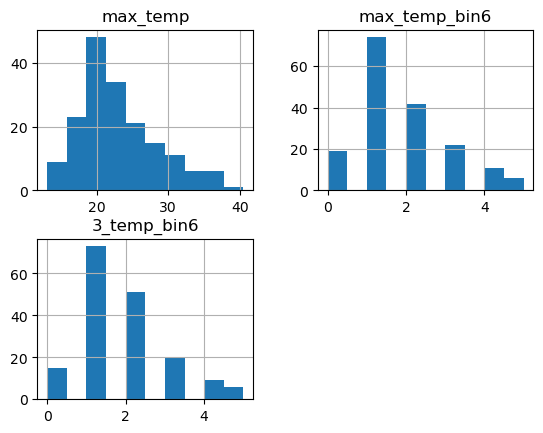

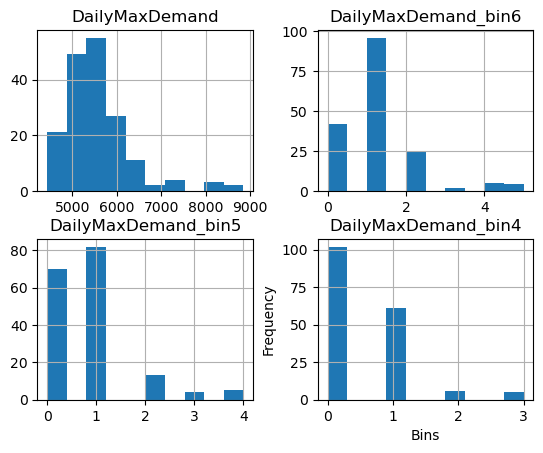

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             174 non-null    object 
 1   Location                         174 non-null    object 
 2   min_temp                         174 non-null    float64
 3   max_temp                         174 non-null    float64
 4   rain                             174 non-null    float64
 5   Direction of maximum wind gust   174 non-null    object 
 6   max_wspeed                       174 non-null    float64
 7   max_wtime                        174 non-null    object 
 8   9_temp                           174 non-null    float64
 9   9_humi                           174 non-null    int64  
 10  9_wdir                           174 non-null    object 
 11  9_wspeed                         174 non-null    float64
 12  9_press               

In [20]:
#1d-2 Data preprocessing binning dependand variable for use in Regression or Classification models

# import pandas
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# new datafram including binned target data
merged_binned = merged_wind
# Alternatively read in cleaned aggregated data: merged_data_final.csv
#merged_data_final_binned = pd.read_csv('merged_data_final.csv', encoding='utf-8')



# 1d-2 Binning data default = 6 bins, numerical

num_bins = 6

merged_binned['max_temp_bin6'] = pd.cut(merged_binned['max_temp'], bins=num_bins, labels=False)
merged_binned['3_temp_bin6'] = pd.cut(merged_binned['3_temp'], bins=num_bins, labels=False)
merged_binned['DailyMaxDemand_bin6'] = pd.cut(merged_binned['DailyMaxDemand'], bins=num_bins, labels=False)
merged_binned['DailyMaxDemand_bin5'] = pd.cut(merged_binned['DailyMaxDemand'], bins=5, labels=False)
merged_binned['DailyMaxDemand_bin4'] = pd.cut(merged_binned['DailyMaxDemand'], bins=4, labels=False)
merged_binned['DailyMaxDemand_bin3'] = pd.cut(merged_binned['DailyMaxDemand'], bins=3, labels=False)


# Visualization of plots to determine if data distribution is retained


# Show histogram of original and binned data
# Independant data
plot_columns = ['max_temp', 'max_temp_bin6','3_temp_bin6']
merged_binned[plot_columns].hist()
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

# Dependant target data
plot_columns = ['DailyMaxDemand', 'DailyMaxDemand_bin6', 'DailyMaxDemand_bin5', 'DailyMaxDemand_bin4']
merged_binned[plot_columns].hist()

plt.xlabel('Bins')
plt.ylabel('Frequency')
#plt.figure(figsize=(10, 5))
plt.show()

## Final datafram
merged_binned.info()
df_all = merged_binned

df_all.to_csv('Group5_data_final.csv', encoding='utf-8', index=True)



## 1e Data exploration and Visualization

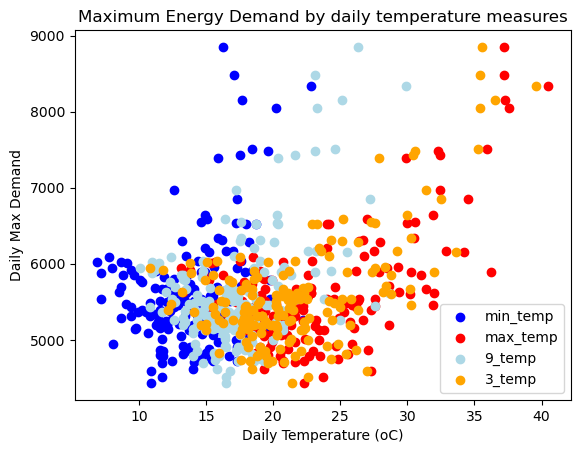

In [21]:
# 1e. Data exploration and visualization

# Scatter plots of data
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df_all = pd.read_csv('Group5_data_final.csv')

plt.scatter(df_all['min_temp'], df_all['DailyMaxDemand'], color='blue', label='min_temp',)
plt.scatter(df_all['max_temp'], df_all['DailyMaxDemand'], color='red', label='max_temp')
plt.scatter(df_all['9_temp'], df_all['DailyMaxDemand'], color='lightblue', label='9_temp',)
plt.scatter(df_all['3_temp'], df_all['DailyMaxDemand'], color='orange', label='3_temp')
plt.xlabel('Daily Temperature (oC)')
plt.ylabel('Daily Max Demand')
plt.legend(loc='lower right') # or 'best'
plt.title('Maximum Energy Demand by daily temperature measures')
plt.show()

# Calulation of Peasons correlation of all data - initial inspection only


# Heatmap plot of Pearsons

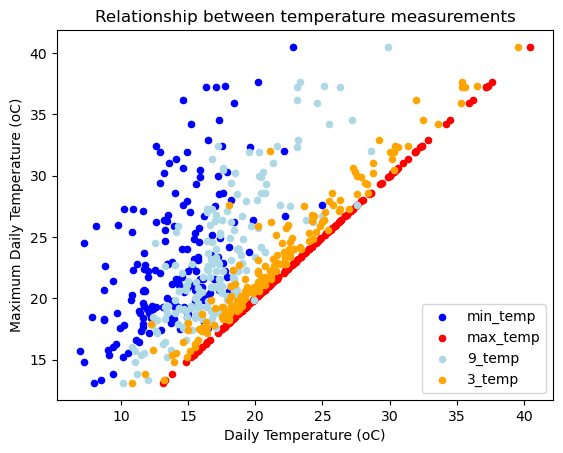

In [22]:
# scatter plots shwing least highly correlated temperatures:
df_all.plot.scatter(x='min_temp', y='max_temp', label='min_temp', color='blue')
df_all.plot.scatter(x='max_temp', y='max_temp', label='max_temp', color='red', ax=plt.gca())
df_all.plot.scatter(x='9_temp', y='max_temp', label='9_temp', color='lightblue', ax=plt.gca())
df_all.plot.scatter(x='3_temp', y='max_temp', label='3_temp', color='orange', ax=plt.gca())

plt.title('Relationship between temperature measurements')
plt.xlabel('Daily Temperature (oC)')
plt.ylabel('Maximum Daily Temperature (oC)')
plt.legend(loc='lower right')
plt.show()

<Axes: xlabel='rain', ylabel='DailyMaxDemand'>

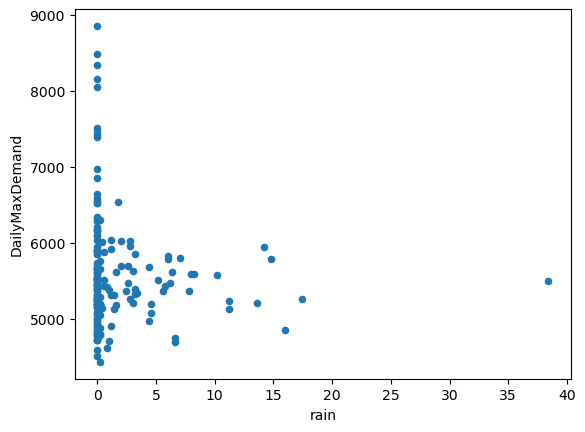

In [23]:
# Scatter plot rain
df_all.plot.scatter(x = 'rain', y = 'DailyMaxDemand')
# May be useful as a Boolean at low temperature




<Axes: xlabel='9_press', ylabel='DailyMaxDemand'>

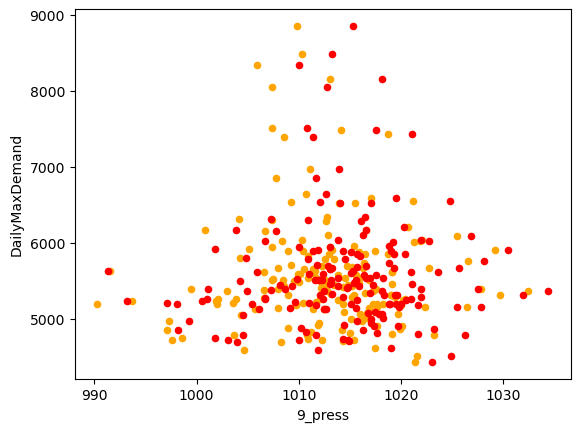

In [24]:
# Shows no rainfall > 6800 May be useful in rainfall yes/no DTC
df_all.plot.scatter(x = '3_press', y = 'DailyMaxDemand', color='orange', ax=plt.gca())
df_all.plot.scatter(x = '9_press', y = 'DailyMaxDemand', color='red', ax=plt.gca())

# Bell shaped data?


<Axes: xlabel='9_humi', ylabel='DailyMaxDemand'>

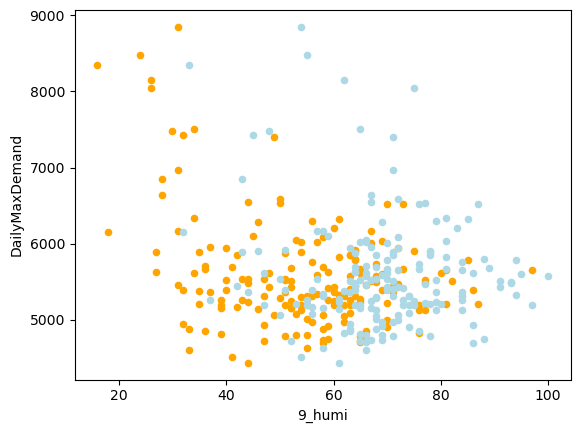

In [25]:
# Bell shaped data?
df_all.plot.scatter(x = '3_humi', y = 'DailyMaxDemand', color='orange', ax=plt.gca())
df_all.plot.scatter(x = '9_humi', y = 'DailyMaxDemand', color='lightblue', ax=plt.gca())
# potential correlation in afternoon

## 1e -2 Basic Pearson correlation exploration

[0.2791754924411037, 0.6005105111350008, 0.4464512720488092, 0.6047938028733985, 0.5169811692899885, 0.805426953967537, 0.44872033959702246, 0.8059054261472441, 0.9663307527971142, 0.7271627284709683]


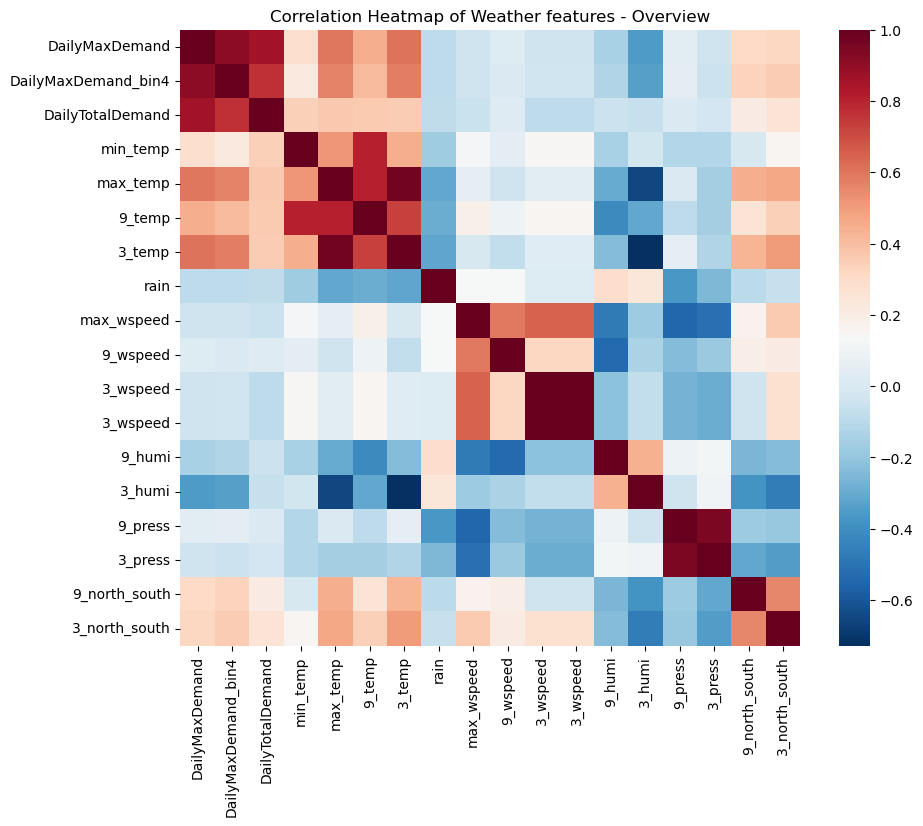

In [26]:
#1e -2 Basic Pearsons corelation Analysis and Visualization
# Use: df_all or df_all = pd.read_csv("Weather8_manclean.csv", encoding ="utf-8")

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

#df_all.info()

# calculating correlation coefficients between variables
correlation_coefficients = [
    df_all['min_temp'].corr(df_all['DailyMaxDemand']),
    df_all['max_temp'].corr(df_all['DailyMaxDemand']),
    df_all['9_temp'].corr(df_all['DailyMaxDemand']),
    df_all['3_temp'].corr(df_all['DailyMaxDemand']),
    df_all['min_temp'].corr(df_all['max_temp']),
    df_all['min_temp'].corr(df_all['9_temp']),
    df_all['min_temp'].corr(df_all['3_temp']),
    df_all['max_temp'].corr(df_all['9_temp']),
    df_all['max_temp'].corr(df_all['3_temp']),
    df_all['9_temp'].corr(df_all['3_temp']),
]
#Print output - 
print(correlation_coefficients)

# CALCULATE Pearson correlation between (almost) ALL numerical data
features = ['DailyMaxDemand',
            'DailyMaxDemand_bin4',
             'DailyTotalDemand',
             'min_temp',
             'max_temp',
             '9_temp',
             '3_temp',
             'rain',
             'max_wspeed',
             '9_wspeed',
             '3_wspeed',
             '3_wspeed',
             '9_humi',
             '3_humi',
             '9_press',
             '3_press',
             '9_north_south',
             '3_north_south'
            ]
#Calculare Pearson correlation between all named features and save as new dataframe name
heatmap_PC_table = df_all[features].corr()

#print(heatmap_PC_table)

# Create a heatmap - from tutorial
plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# Cmap colours: RdBu_r, coolwarm, viridis
sns.heatmap(heatmap_PC_table,cmap='RdBu_r')
plt.title("Correlation Heatmap of Weather features - Overview")
plt.show()


# End Part 1 - Data Cleaning and Visualization

# Part 2 - Model Building

## 2A. Model Preparation


In [108]:
# 2A-1: Pearson corelations MK - Generates table 1

# CALCULATING PEARSON COEFFICIENT BETWEEN MAXIMUM ENERGY DEMAND (TARGET VARIABLE) AND MULTIPLE FEATURES

import pandas as pd
from scipy.stats import pearsonr

#Dataframe to use Assignment2 group5: df_all

def calculate_pearson_correlation1(df_all, feature_columns, target_column, output_csv):
    """This function calculates Pearson correlation coefficient for multiple features and a single target 
    variable.
    input: df_all or csv:Group5_data_final.csv
    output: printed or pearson_correlation_results_MaxDemand_2.csv"""
    correlations = {'Feature': [], 'Pearson Correlation Coefficient': [], 'P-value': []}
    
    for feature_column in feature_columns:
        # Convert columns to numeric and handle non-numeric values
        df_all[feature_column] = pd.to_numeric(df_all[feature_column], errors='coerce')
        df_all[target_column] = pd.to_numeric(df_all[target_column], errors='coerce')

        # Calculate Pearson correlation coefficient and p-value
        pearson_corr, p_value = pearsonr(df_all[feature_column], df_all[target_column])
        correlations['Feature'].append(feature_column)
        correlations['Pearson Correlation Coefficient'].append(pearson_corr)
        correlations['P-value'].append(p_value)

        #print(f"Pearson correlation coefficient between {feature_column} and {target_column}: {pearson_corr}")
        #print(f"P-value for the test: {p_value}\n")

    # Create a DataFrame from the correlations dictionary
    correlations_df = pd.DataFrame(correlations)

    # Save the DataFrame to a CSV file
    correlations_df.to_csv(output_csv, index=False)
    print(f"\nResults saved to {output_csv}")

    return correlations_df

# Read the CSV file into a DataFrame 
df_all = pd.read_csv('Group5_data_final.csv') #Substitute appropriate data file as necessary


# Specify the columns to be tested and ensure that correct column names are used and ensure there is no NaN or infs
feature_columns_to_test = [
                            'max_temp', 
                            'min_temp', 
                            'rain', 
                            'max_wspeed', 	
                            '9_temp',	
                            '9_humi',	
                            '9_wspeed',	
                            '9_press',	
                            '3_temp',	
                            '3_humi',	
                            '3_wspeed',	
                            '3_press'
                            ] # Add more columns as needed
target_column = 'DailyMaxDemand' # Insert appropriate column name 
#Targets: MAXDEMAND	MEANDEMAND	MAXPRICE	MEANPRICE

# Specify the output CSV file
output_csv_file = 'pearson_correlation_results_MaxDemand_2.csv' # Use appropriate name for the output file

# Calculate Pearson correlation coefficients and p-values for specified columns
correlations_df.sort_values(by = 'Pearson Correlation Coefficient', ascending=False)
print(correlations_df)

       Feature  Pearson Correlation Coefficient       P-value
0     max_temp                         0.600511  1.978787e-18
1     min_temp                         0.279175  1.911130e-04
2         rain                        -0.093016  2.221721e-01
3   max_wspeed                        -0.045903  5.475366e-01
4       9_temp                         0.446451  6.634239e-10
5       9_humi                        -0.145762  5.496706e-02
6     9_wspeed                         0.014441  8.499932e-01
7      9_press                         0.039406  6.056788e-01
8       3_temp                         0.604794  9.786057e-19
9       3_humi                        -0.355334  1.499118e-06
10    3_wspeed                        -0.044519  5.596880e-01
11     3_press                        -0.041818  5.837764e-01


In [41]:
# 2A-2: Function for finding at what temperature filter give best Pearson coefficient 3_temp vs DailyMaxDemand
#Optimizes temperature cut

import pandas as pd
from scipy.stats import pearsonr

def calculate_pearson_correlation2(df, feature_columns, target_column, threshold_temps, output_csv):
    """Purpose: Select the most appropriate threshold temperature to refine the linear regression predictive model
    
    Function Calculates:Pearson correlation coefficient between a single feature variable and a single target variable 
    at different temperature ranges. The ranges are defined by different lower temperatures and maximum temperature measured at 3pm.
     
     Input:'Group5_data_final.csv'
     Output:'pearson_correlation_Temp_threshold_MaxDemand.csv """
    correlations = {'Feature': [], 'Threshold Temperature': [], 'Pearson Correlation Coefficient': [], 'P-value': []}

    for feature_column in feature_columns:
        for threshold_temp in threshold_temps:
            # Filter the data based on the threshold temperature: change temp feature here as required
            subset_df = df[df_all['3_temp'] >= threshold_temp]

            # Calculate Pearson correlation coefficient and p-value
            pearson_corr, p_value = pearsonr(subset_df[feature_column], subset_df[target_column])

            # Store the results in the dictionary
            correlations['Feature'].append(feature_column)
            correlations['Threshold Temperature'].append(threshold_temp)
            correlations['Pearson Correlation Coefficient'].append(pearson_corr)
            correlations['P-value'].append(p_value)

            #print(f"Pearson correlation coefficient between {feature_column} and {target_column} "
             #     f"for temperatures >= {threshold_temp}: {pearson_corr}")
            #print(f"P-value for the test: {p_value}\n")

    # Create a DataFrame from the correlations dictionary
    correlations_df = pd.DataFrame(correlations)

    # Save the DataFrame to a CSV file
    correlations_df.to_csv(output_csv, index=False)
    print(f"\nResults saved to {output_csv}")

    return correlations_df

# Read the CSV file into a DataFrame
df = pd.read_csv('Group5_data_final.csv')
df = df.apply(pd.to_numeric, errors='coerce')

# Specify the columns to be tested
feature_columns_to_test = ['3_temp']  # Add more columns as needed
target_column = 'DailyMaxDemand'

# Specify the threshold temperatures. Different temperatures can be entered. Note that the higher temperature 
# threshold decreases the number of values left for testing.
threshold_temps = [14,16, 17, 18, 19, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0] 

# Specify the output CSV file
output_csv_file = 'pearson_correlation_Temp_threshold_MaxDemand.csv'

# Calculate Pearson correlation coefficients and p-values for specified columns and thresholds
correlations_df = calculate_pearson_correlation2(df, feature_columns_to_test, target_column, threshold_temps, output_csv_file)
print(correlations_df)



Results saved to pearson_correlation_Temp_threshold_MaxDemand.csv
   Feature  Threshold Temperature  Pearson Correlation Coefficient  \
0   3_temp                   14.0                         0.664257   
1   3_temp                   16.0                         0.704269   
2   3_temp                   17.0                         0.726828   
3   3_temp                   18.0                         0.738847   
4   3_temp                   19.0                         0.764532   
5   3_temp                   20.0                         0.756257   
6   3_temp                   20.5                         0.753367   
7   3_temp                   21.0                         0.755899   
8   3_temp                   21.5                         0.751965   
9   3_temp                   22.0                         0.757376   
10  3_temp                   22.5                         0.739602   
11  3_temp                   23.0                         0.741158   
12  3_temp             

In [43]:
# 2A-3 Code outputting the Pearsons correlation with the opimal temperature threshold (From Code 2A-2)

# my version
"""Script to find at what temperature cutoff do you find the max pearsons correlation at hot values (+ correlation)
and at cold values (- ve correlation)
input: df_all or read 'Group5_data_final.csv'
output: peasons correlation all values, above cutoff, below cutoff
optimize: temperature of cutoff"""

# read csv if required
#df_all = pd.read_csv('Group5_data_final.csv')

# Manually change temperatures [14-28 oC] - or use cutoff from Code 2A-2 
max_temp_hotcut = (df_all['max_temp'] >= 20) 
max_temp_coldcut = (df_all['max_temp'] <= 21) 

# Apply the condition to both DataFrames
hotcut_df_all = df_all[max_temp_hotcut]
coldcut_df_all = df_all[max_temp_coldcut]

# Calculate the correlation coefficient for orgiginal and filtered subsets
correlation_coefficient1 = df_all['max_temp'].corr(df_all['DailyMaxDemand'])
correlation_coefficient2 = hotcut_df_all['max_temp'].corr(df_all['DailyMaxDemand'])
correlation_coefficient3 = coldcut_df_all['max_temp'].corr(df_all['DailyMaxDemand'])

print(f"Pearson's correlation coefficient for the subset all oC: {correlation_coefficient1}")
print(f"Pearson's correlation coefficient for the subset >20 oC: {correlation_coefficient2}")
print(f"Pearson's correlation coefficient for the subset <21 oC: {correlation_coefficient3}")

#Summary:
# Peasons coefficient maximum where max_temp_hotcut >20 oC   0.762 strong positive relationship
# Peasons coefficient maximum where max_temp_coldcut <21 oC -0.515 moderate negative relationship
# REcommended split of max_temp for linear regression modelling = 20.5 oC

#Insights
# Correlations are not causations
# MaxDemand has strong positive correlatino with max_temp >20 oC
# MaxDemand has moderate negative correlation with max_temp <21 oC
# Suggesting bimodel behaviour. 
# REcommended split of max_temp for linear regression modelling = 20.5 oC


Pearson's correlation coefficient for the subset all oC: 0.6005105111350008
Pearson's correlation coefficient for the subset >20 oC: 0.7623243309728138
Pearson's correlation coefficient for the subset <21 oC: -0.5154336067795816


## 2B. Model Building


Split 1:
R-squared score: 0.2657
Mean squared error: 299014.0582

5 Random Actual MaxDemand values of the test data:
0    5731.10
1    4803.80
2    6317.41
3    5378.45
4    5672.06
Name: Actual, dtype: float64

Predicted MaxDemand values corresponding to the 5 random test data:
0    4697.298427
1    4832.624792
2    5644.582983
3    4727.370953
4    4757.443478
Name: Predicted, dtype: float64


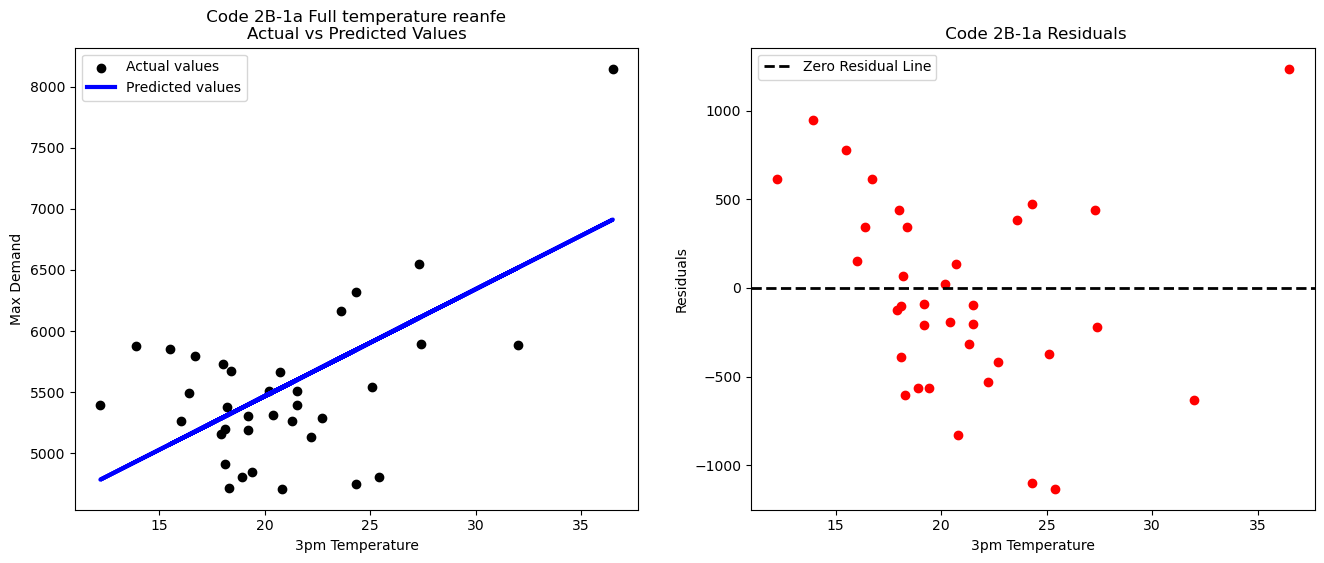


Average Scores:
 Code 2B-1a Average R-squared: 0.2657
 Code 2B-1a Average MSE: 299014.0582


In [125]:
# 2B-1a Linear regression 1 variable 3_temp over all temperature range, 1 split

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

"""Linear Regression Model FULL temperature range:
LR_Model: Test train splits data, [noscaling] fits linear regression , Predictions. 
            test_size=0.3, random_state=42
Variables: Full temperature range
Input: 'Group5_data_final.csv'
Output: Coefficients, Intercept, R-squared score, Mean squared error
        Actual vs Predict scatter plot, Residuals """


# Load the CSV data into a DataFrame
data = pd.read_csv('Group5_data_final.csv')

# Separate the independent and dependent variables
X = data["3_temp"]
y = data["DailyMaxDemand"]

# Number of splits
num_splits = 1

# Lists to store evaluation metrics for each split
r2_scores = []
mse_scores = []

for i in range(num_splits):
    # Split the data into training and testing sets. Optimal: test_size=0.3 (test_size=0.2 r2 = 0.13)
    X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.3, random_state=1)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions for the testing set
    y_pred = model.predict(X_test)

    # Calculate R-squared and MSE scores for the current split
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Append scores to the lists
    r2_scores.append(r2)
    mse_scores.append(mse)

    print(f"\nSplit {i + 1}:")
    print(f"R-squared score: {r2:.4f}")
    print(f"Mean squared error: {mse:.4f}")
    
    print("\n5 Random Actual MaxDemand values of the test data:")
    print(random_df['Actual'])

    print("\nPredicted MaxDemand values corresponding to the 5 random test data:")
    print(random_df['Predicted'])

    # Plot actual vs predicted values
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(X_test, y_test, color='black', label='Actual values')
    plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted values')
    plt.title(' Code 2B-1a Full temperature reanfe \nActual vs Predicted Values')
    plt.xlabel('3pm Temperature')
    plt.ylabel('Max Demand')
    plt.legend()

    # Plot residuals
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    plt.scatter(X_test, residuals, color='red')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2, label='Zero Residual Line')
    plt.title(' Code 2B-1a Residuals')
    plt.xlabel('3pm Temperature')
    plt.ylabel('Residuals')
    plt.legend()

    plt.show()

# Print average scores across all splits
print("\nAverage Scores:")
print(f" Code 2B-1a Average R-squared: {sum(r2_scores) / num_splits:.4f}")
print(f" Code 2B-1a Average MSE: {sum(mse_scores) / num_splits:.4f}")


In [93]:
## 2B-1b: K-fold analysis for model Code 2B1a (above)

"""Linear Regression Model FULL temperature range:
LR_Model: Test train splits data, [noscaling] fits linear regression , Predictions. 
            test_size=0.3, random_state=42
Variables: Full temperature range
Input: 'Group5_data_final.csv'
Output: K-fold analysis """

#LINEAR REGRESSION FOR MAXIMUM ENERGY DEMAND AS A FUNCTION OF TEMPERATURE MEASURED AT 3 PM.
#K=5 random splits were used over the whole temperature range
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV data into a DataFrame
data = pd.read_csv('Group5_data_final.csv')

# Separate the independent and dependent variables
X = data["3_temp"]
y = data["DailyMaxDemand"]

# Number of splits
num_splits = 5

# Lists to store evaluation metrics for each split
r2_scores = []
mse_scores = []

for i in range(num_splits):
    # Split the data into training and testing sets. 0.7/0.3 train/test split was founf to be better than 0.8/0.2
    X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.3, random_state=i)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions for the testing set
    y_pred = model.predict(X_test)

    # Calculate R-squared and MSE scores for the current split
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Append scores to the lists
    r2_scores.append(r2)
    mse_scores.append(mse)

    print(f"\nSplit {i + 1}:")
    print(f"R-squared score: {r2:.4f}")
    print(f"Mean squared error: {mse:.4f}")

# Print average scores across all splits
print("Code 2B1b \nAverage Scores:")
print(f"Code 2B1b Average R-squared: {sum(r2_scores) / num_splits:.4f}")
print(f"Code 2B1b Average MSE: {sum(mse_scores) / num_splits:.4f}")



Split 1:
R-squared score: 0.4918
Mean squared error: 340906.4074

Split 2:
R-squared score: 0.2635
Mean squared error: 362392.7513

Split 3:
R-squared score: 0.1762
Mean squared error: 422750.3553

Split 4:
R-squared score: 0.3120
Mean squared error: 479679.4276

Split 5:
R-squared score: 0.3157
Mean squared error: 478666.7040
Code 2B1b 
Average Scores:
Code 2B1b Average R-squared: 0.3119
Code 2B1b Average MSE: 416879.1291


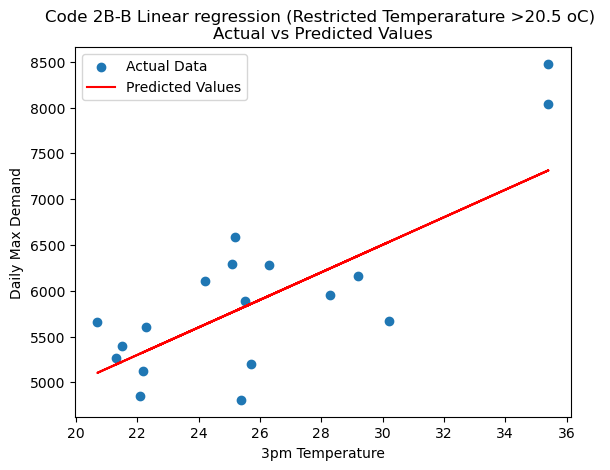

 2B-2a Coefficients: 150.3626278156965
 2B-2a Intercept: 1990.7711266016668

R-squared score: 0.6224
Mean squared error: 341369.4898

5 Random Actual MaxDemand values of the test data:
0    5731.10
1    4803.80
2    6317.41
3    5378.45
4    5672.06
Name: Actual, dtype: float64

Predicted MaxDemand values corresponding to the 5 random test data:
0    4697.298427
1    4832.624792
2    5644.582983
3    4727.370953
4    4757.443478
Name: Predicted, dtype: float64


In [116]:
# 2B-2aTemp cut One independant variable: lin_regression_for_3pmTemp_above 20.5. py_singlesplit.py

# IS SCALING an imporatnat step of preprocessing linear regression. 

"""Linear_regression Model with temp data filterd >20.5 before spliting
Model: Filters 3_temp data>20.5, Test train splits data, [noscaling] fits linear regression , Predictions. 
        test_size=0.3, random_state=42
        
input: "Group5_data_final.csv"
output: Coefficients, Intercept, R-squared score, Mean squared error
        Actual vs Predict scatter plot

"""
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV data into a DataFrame
data = pd.read_csv("Group5_data_final.csv")

# Filter data points above the lower temperature threshold
data_filtered = data[data['3_temp'] >= 20.5]

# Print the first few rows of the filtered data
#print("Filtered Data:")
#print(data_filtered.head())

# Separate the independent and dependent variables
X = data_filtered["3_temp"]
y = data_filtered["DailyMaxDemand"]

# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.2, random_state=1)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions for the testing set
y_pred = model.predict(X_test)

# Plot actual and predicted values
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, y_pred, label='Predicted Values', color='red')
plt.xlabel('3pm Temperature')
plt.ylabel('Daily Max Demand')
plt.legend()
plt.title('Code 2B-B Linear regression (Restricted Temperarature >20.5 oC) \nActual vs Predicted Values')
plt.show()

# Print the model coefficients and intercept
print(f" 2B-2a Coefficients: {model.coef_[0]}")
print(f" 2B-2a Intercept: {model.intercept_}")

# Calculate and display R-squared and MSE scores
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nR-squared score: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")

# Sample 5 random rows from the original data
random_rows = data.sample(5, random_state=42)

# Create a DataFrame for the sampled rows
random_df = pd.DataFrame({
    'Actual': random_rows['DailyMaxDemand'].values,
    'Predicted': model.predict(random_rows['3_temp'].values.reshape(-1, 1))
})

print("\n5 Random Actual MaxDemand values of the test data:")
print(random_df['Actual'])

print("\nPredicted MaxDemand values corresponding to the 5 random test data:")
print(random_df['Predicted'])


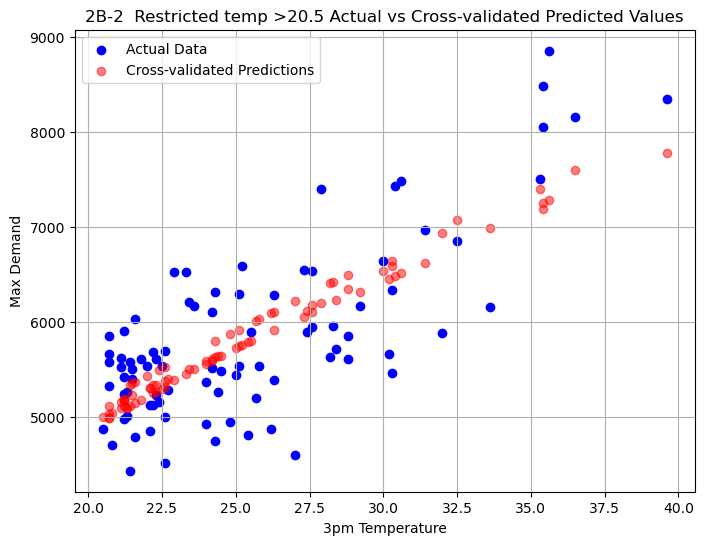

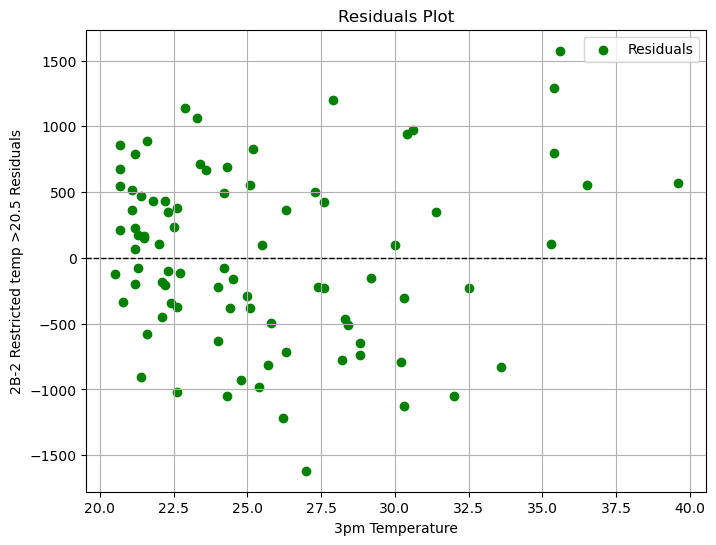


Split 1:
R-squared score: 0.4427
Mean squared error: 625327.4044

Split 2:
R-squared score: 0.4663
Mean squared error: 522657.5503

Split 3:
R-squared score: 0.6866
Mean squared error: 391415.2584

Split 4:
R-squared score: 0.6462
Mean squared error: 337148.4772

Split 5:
R-squared score: 0.6370
Mean squared error: 270818.2039
2b-2b
Average Scores:
Average R-squared: 0.5676
Average MSE: 429473.3788


In [127]:
# 2B2b lin_reg_3pm_Maxdemand_5_fold_cv_plots.py

# K fold analysis withe MSE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

"""Linear_regression Model with temp data filterd >20.5 before spliting
Model: Filters 3_temp data>20.5, Test train splits data, [noscaling] fits linear regression , Predictions. 
        test_size=0.3, random_state= 5 fold analysis
        
input: "Group5_data_final.csv"
output: Kfold-Analysis with custom scorer
        Actual vs Predict scatter and residueals plot"""

# Load the CSV data into a DataFrame
data = pd.read_csv("Group5_data_final.csv")

# Filter data points above the lower temperature threshold
data_filtered = data[data['3_temp'] >= 20.5]

# Print the first few rows of the filtered data
#print("Filtered Data:")
#print(data_filtered.head())

# Separate the independent and dependent variables
X = data_filtered["3_temp"]
y = data_filtered["DailyMaxDemand"]

# Create a linear regression model
model = LinearRegression()

# Define a custom scorer for cross_val_score since we want to minimize MSE
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform 5-fold cross-validation and get negative MSE scores
cv_predictions = cross_val_predict(model, X.values.reshape(-1, 1), y, cv=5)
cv_scores = cross_val_score(model, X.values.reshape(-1, 1), y, cv=5, scoring=scorer)

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
# Plot actual data points
plt.scatter(X, y, label='Actual Data', color='blue')
# Plot cross-validated predictions
plt.scatter(X, cv_predictions, label='Cross-validated Predictions', color='red', alpha=0.5)

plt.xlabel('3pm Temperature')
plt.ylabel('Max Demand')
plt.legend()
plt.title('2B-2  Restricted temp >20.5 Actual vs Cross-validated Predicted Values')
plt.grid(True)
plt.show()

# Plot residuals
residuals = y - cv_predictions
plt.figure(figsize=(8, 6))
plt.scatter(X, residuals, label='Residuals', color='green')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('3pm Temperature')
plt.ylabel('2B-2 Restricted temp >20.5 Residuals')
plt.legend()
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

# Print the cross-validation scores
for i, score in enumerate(cv_scores, start=1):
    # Split the data into training and testing sets for each iteration
    X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.3, random_state=i)

    # Fit the model on the training set and calculate R-squared for the test set
    model.fit(X_train, y_train)
    r2 = r2_score(y_test, model.predict(X_test))

    print(f"\nSplit {i}:")
    print(f"R-squared score: {r2:.4f}")
    print(f"Mean squared error: {-score:.4f}")

# Print average scores across all splits
print("2B-2b\nAverage Scores:")
print(f"Average R-squared: {sum(r2_score(y, model.fit(X.values.reshape(-1, 1), y).predict(X.values.reshape(-1, 1))) for _ in range(5)) / 5:.4f}")
print(f"Average MSE: {sum(-score for score in cv_scores) / 5:.4f}")

# 2C Multi-feature linear regression - feature selection


### 2C-1a - Linear regeession - Feature selection - full temperature range 

In [117]:
#2C-a - Fionna Linear regeession single all temps + Kfold

# My Weather version: W9 and now W10
"""input: df_all or "Group5_data_final.csv"
Linear_Regression model: All temp range, Test train splits data, [noscaling] fits linear regression , Predictions. 
        train_size=0.8, random_state= 1 (NB:train_size=0.7 and random_state=1 or 42 terrible results)
Outputs: Scaled(Coefficients, Intercept), 5 x Actual & Predicted Y,  R-squared score, Mean squared error """

import pandas as pd
from sklearn import datasets 
# Check difference in knlearn: linear_model vs LinearRegression
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
#from sklearn import impute
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold

# Load data from csv into datafram 'dataset'
dataset = pd.read_csv("Group5_data_final.csv")

# Specify features (X) and dependant target values (Y)
#display(filt_dataset.head())
X = dataset[['3_temp']] #,'3_press','3_north_south','3_wspeed' ]] #'3_wspeed
Y = dataset['DailyMaxDemand']

# Split data into training and testing sets at 80% split with specifyed random state train_size=0.8,
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


######Preprocessing######

#scaling (standardization) calculates mean and SD from X_train, then applies to X_train data stransmormation 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Imputing missing data Not needed as data already imputed in cleaning stage 
#imputer = impute.SimpleImputer().fit(X_train)
#X_train=imputer.transform(X_train)
#X_test=imputer.transform(X_test)

# Instantiate linear regression model
lm = linear_model.LinearRegression()

# Fitting model to training independant and dependant training data
lm.fit(X_train, y_train)


# Predict and write into y_pred
y_pred = lm.predict(X_test)

# Results of modelling - after scaling - don not use for single linear fit line in graphical output
print(f" Linear model coefficient {lm.coef_}, Linear model intercept {lm.intercept_}")

# Evaluation of model - only testing fitting 
r2_test = lm.score(X_test, y_test)
print("R2 test:", r2_test)

# Evaluation data vs predicted data with R2 and RMSE:
print('actual MaxDemand energy values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MaxDemand energy values of the first 5 test data:')
print(y_pred[0:5])
print('')

print(f"R2 score:, {r2_score(y_test, y_pred)} of data predicted by this model")
# Output the RSME in real world term (what Eneegy in kwatts?)
print("RMSE score:", mean_squared_error(y_test, y_pred, squared=False))
      
##### PRINT SCATTER PLOT OF DATA, and predicted line or data#########


 Linear model coefficient [482.4486108], Linear model intercept 5614.254676258993
R2 test: 0.12820180570965556
actual MaxDemand energy values of the first 5 test data:
93     5188.93
114    7426.80
19     4847.67
69     5903.66
53     4792.81
Name: DailyMaxDemand, dtype: float64

predicted MaxDemand energy values of the first 5 test data:
[5489.96156883 6401.615825   5418.45927422 5579.33943708 5615.09058438]

R2 score:, 0.12820180570965556 of data predicted by this model
RMSE score: 588.3302204395568


In [120]:
# 2C-b -FL 3_temp linear regression model with scaling -  Kfold analysis 

import pandas as pd
from sklearn import datasets 
# Check difference in knlearn: linear_model vs LinearRegression
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
#from sklearn import impute
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold

"""Linear_regression Model with temp data filterd >20.5 before spliting
Model: Filters 3_temp data>20.5, Test train splits data, [noscaling] fits linear regression , Predictions. 
        test_size=0.3, random_state= 5 fold analysis
        
input: "Group5_data_final.csv"
output: Kfold-Analysis with custom scorer
        Actual vs Predict scatter and residueals plot"""

# Load data from csv into datafram 'dataset'
dataset = pd.read_csv("Group5_data_final.csv")

# Optional - filterm 3_temp at 20.5 oC as per optimized Pearsons coefficient in Data exploration
filt_dataset = dataset[dataset['3_temp'] > 20.5]
# Adding in low temp negative correlation dataset - doesn't work when added
# filt_dataset = dataset[dataset['max_temp'] < 20.5]

# Specify features (X) and dependant target values (Y)
#display(filt_dataset.head())
X = filt_dataset[['3_temp',]]
y = filt_dataset['DailyMaxDemand']

# Number of splits
num_splits = 5

# Lists to store evaluation metrics for each split
r2_scores = []
mse_scores = []

for i in range(num_splits):
    # Split the data into training and testing sets. FL found 0.8/0.2 train/test split to be better than 0.7/0.3
    X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.2, random_state=i)

    # Create a linear regression model
    model = linear_model.LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions for the testing set
    y_pred = model.predict(X_test)

    # Calculate R-squared and MSE scores for the current split
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Append scores to the lists
    r2_scores.append(r2)
    mse_scores.append(mse)

    print(f"\nSplit {i + 1}:")
    print(f"R-squared score: {r2:.4f}")
    print(f"Mean squared error: {mse:.4f}")

# Print average scores across all splits
print("Code 2C \nAverage Scores:")
print(f"Code 2C Average R-squared: {sum(r2_scores) / num_splits:.4f}")
print(f"Code 2C Average MSE: {sum(mse_scores) / num_splits:.4f}")



Split 1:
R-squared score: 0.1824
Mean squared error: 349430.2744

Split 2:
R-squared score: 0.6294
Mean squared error: 374564.8452

Split 3:
R-squared score: 0.5168
Mean squared error: 354224.9750

Split 4:
R-squared score: 0.6706
Mean squared error: 568592.8960

Split 5:
R-squared score: 0.6243
Mean squared error: 337678.5200
Code 2B1b 
Average Scores:
Code 2B1b Average R-squared: 0.5247
Code 2B1b Average MSE: 396898.3021


### 2C-2 - Linear regression - Feature selection - Restricted temperature

In [122]:
#2C-2 Linear Regression MODEL with temperature cutoff
"""input: df_all or "Group5_data_final.csv"
Linear_Regression model: Temp cutoff >20.5 oC, Test train splits data, [noscaling] fits linear regression , Predictions. 
        train_size=0.8, random_state= 1 (NB:train_size=0.7 and random_state=1 or 42 terrible results)
Outputs:5 x Actual & Predicted Y,  R-squared score, Mean squared error """

import pandas as pd
from sklearn import datasets 
# Check difference in knlearn: linear_model vs LinearRegression
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
#from sklearn import impute
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold

# Load data from csv into datafram 'dataset'
dataset = pd.read_csv("Group5_data_final.csv")

# Optional - filterm 3_temp at 20.5 oC as per optimized Pearsons coefficient in Data exploration
filt_dataset = dataset[dataset['3_temp'] > 20.5]


# Specify features (X) and dependant target values (Y)
#display(filt_dataset.head())
X = filt_dataset[['3_temp']] #,'3_press','3_north_south','3_wspeed' ]] #'3_wspeed
Y = filt_dataset['DailyMaxDemand']

# Split data into training and testing sets at 80% split with specifyed random state
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


######Preprocessing######

#scaling (standardization) calculates mean and SD from X_train, then applies to X_train data stransmormation 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Imputing missing data Not needed as data already imputed in cleaning stage 
#imputer = impute.SimpleImputer().fit(X_train)
#X_train=imputer.transform(X_train)
#X_test=imputer.transform(X_test)

# Instantiate linear regression model
lm = linear_model.LinearRegression()

# Fitting model to training independant and dependant training data
lm.fit(X_train, y_train)


# Predict and write into y_pred
y_pred = lm.predict(X_test)

# Results of modelling - after scaling - don not use for single linear fit line in graphical output
print(f" Linear model coefficient {lm.coef_}, Linear model intercept {lm.intercept_}")

# Evaluation of model - only testing fitting 
r2_test = lm.score(X_test, y_test)
print("R2 test:", r2_test)

# Evaluation data vs predicted data with R2 and RMSE:
print('actual MaxDemand energy values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MaxDemand energy values of the first 5 test data:')
print(y_pred[0:5])
print('')

print(f"R2 score:, {r2_score(y_test, y_pred)} of data predicted by this model")
# Output the RSME in real world term (what Eneegy in kwatts?)
print("RMSE score:", mean_squared_error(y_test, y_pred, squared=False))


 Linear model coefficient [645.00444186], Linear model intercept 5796.69544117647
R2 test: 0.6294277551722427
actual MaxDemand energy values of the first 5 test data:
82    5001.23
88    6156.71
67    5607.49
84    5711.53
77    8850.61
Name: DailyMaxDemand, dtype: float64

predicted MaxDemand energy values of the first 5 test data:
[5384.75010774 7097.56338961 6350.15395752 6287.86983818 7408.98398631]

R2 score:, 0.6294277551722427 of data predicted by this model
RMSE score: 612.0170301493777


### 2C -3 Linear Regression - BEST feature Selection combination

In [123]:
#2C-3a Fionna Linear Regaression Multi temp cutof when temp features included
"""input: df_all or "Group5_data_final.csv"
Linear_Regression model: Temp cutoff >20.5 oC, Test train splits data, [noscaling] fits linear regression , Predictions. 
        train_size=0.8, random_state= 1 (NB:train_size=0.7 and random_state=1 or 42 terrible results)
        Optimum features:'3_temp', '3_humi', 3_press’,'3_north_south'
Outputs: Scaled(Coefficients, Intercept), 5 x Actual & Predicted Y,  R-squared score, Mean squared error """

import pandas as pd
from sklearn import datasets 
# Check difference in knlearn: linear_model vs LinearRegression
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
#from sklearn import impute
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold

# Load data from csv into datafram 'dataset'
dataset = pd.read_csv("Group5_data_final.csv")

# Optional - filterm 3_temp at 20.5 oC as per optimized Pearsons coefficient in Data exploration
filt_dataset = dataset[dataset['3_temp'] > 20.5]


# Specify features (X) and dependant target values (Y)
#display(filt_dataset.head())
X = filt_dataset[['3_temp', '3_humi','3_press', '3_north_south']] 
Y = filt_dataset['DailyMaxDemand']

# Split data into training and testing sets at 80% split with specifyed random state
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


######Preprocessing######

#scaling (standardization) calculates mean and SD from X_train, then applies to X_train data stransmormation 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Imputing missing data Not needed as data already imputed in cleaning stage 


# Instantiate linear regression model
lm = linear_model.LinearRegression()

# Fitting model to training independant and dependant training data
lm.fit(X_train, y_train)


# Predict and write into y_pred
y_pred = lm.predict(X_test)

# Results of modelling - after scaling - don not use for single linear fit line in graphical output
print(f" Linear model coefficient {lm.coef_}, Linear model intercept {lm.intercept_}")

# Evaluation of model - only testing fitting 
r2_test = lm.score(X_test, y_test)
print("R2 test:", r2_test)

# Evaluation data vs predicted data with R2 and RMSE:
print('actual MaxDemand energy values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MaxDemand energy values of the first 5 test data:')
print(y_pred[0:5])
print('')

print(f"R2 score:, {r2_score(y_test, y_pred)} of data predicted by this model")
# Output the RSME in real world term (what Eneegy in kwatts?)
print("RMSE score:", mean_squared_error(y_test, y_pred, squared=False))
      
##### PRINT SCATTER PLOT OF DATA, and residuals #########


 Linear model coefficient [1012.57190347  436.26370841  119.93118381  -36.58251018], Linear model intercept 5796.695441176471
R2 test: 0.7625044643932188
actual MaxDemand energy values of the first 5 test data:
82    5001.23
88    6156.71
67    5607.49
84    5711.53
77    8850.61
Name: DailyMaxDemand, dtype: float64

predicted MaxDemand energy values of the first 5 test data:
[5889.88218688 6763.01129093 6257.08128266 6082.13784323 7710.16640384]

R2 score:, 0.7625044643932188 of data predicted by this model
RMSE score: 489.9534138628438


In [57]:
#2C-3b MK Version of Kfold with MSE of 2C-3b - Best 4 datasets: '3_temp', '3_humi','3_press', '3_north_south'

"""Linear_regression Model with Best Features - Kfold analysis 
Settings:  test_size=0.2, random_state= 1, 5 K-fold analysis        
input: "Group5_data_final.csv"
output: Kfold-Analysis with custom scorer
        Actual vs Predict scatter and residueals plot"""

import pandas as pd
from sklearn import datasets 
# Check difference in knlearn: linear_model vs LinearRegression
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
#from sklearn import impute
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold

# Load data from csv into datafram 'dataset'
dataset = pd.read_csv("Group5_data_final.csv")

# Optional - filterm 3_temp at 20.5 oC as per optimized Pearsons coefficient in Data exploration
filt_dataset = dataset[dataset['3_temp'] > 20.5]
# Adding in low temp negative correlation dataset - doesn't work when added
# filt_dataset = dataset[dataset['max_temp'] < 20.5]

# Specify features (X) and dependant target values (Y)
#display(filt_dataset.head())
X = filt_dataset[['3_temp', '3_humi','3_press', '3_north_south']]

# Number of splits
num_splits = 5

# Lists to store evaluation metrics for each split
r2_scores = []
mse_scores = []

for i in range(num_splits):
    # Split the data into training and testing sets. FL found 0.8/0.2 train/test split to be better than 0.7/0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Create a linear regression model
    model = linear_model.LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions for the testing set
    y_pred = model.predict(X_test)

    # Calculate R-squared and MSE scores for the current split
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Append scores to the lists
    r2_scores.append(r2)
    mse_scores.append(mse)

    print(f"\nSplit {i + 1}:")
    print(f"R-squared score: {r2:.4f}")
    print(f"Mean squared error: {mse:.4f}")

# Print average scores across all splits
print("Code 2C-3b \nAverage Scores:")
print(f"Code 2C-3b Average R-squared: {sum(r2_scores) / num_splits:.4f}")
print(f"Code 2C-3b Average MSE: {sum(mse_scores) / num_splits:.4f}")



Split 1:
R-squared score: 0.4168
Mean squared error: 249256.1149

Split 2:
R-squared score: 0.7625
Mean squared error: 240054.3478

Split 3:
R-squared score: 0.6669
Mean squared error: 244239.3534

Split 4:
R-squared score: 0.7918
Mean squared error: 359369.1641

Split 5:
R-squared score: 0.6736
Mean squared error: 293398.3533
Code 2C-3b 
Average Scores:
Code 2C-3b Average R-squared: 0.6623
Code 2C-3b Average MSE: 277263.4667


### 3 Appendix Decision Tree Classificatoin - Comparison

In [ ]:
# 3 Appendix Desicion Tree Classificatoin - Comparison - Backs up that temperature holds the main information

########## DESCISION TREE - CLASSIFITCAION#############
# This modelling has potential to model over whole range of temperatures including low ones
# Accuracy was found to be poor with Classlabel in 6 bins
# Accuracy increased dramatically with Classlabel in 3-4 bins as class label became more boolean. 

"""MODEL: Decision Tree Classifier
input:Group5_data_final.csv"
Optimum set of features based on accuracy: '3_temp','3_humi', '3_press', 'min_temp'
output: accuracy score and DTC figure"""
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Read in dataset
dataset = pd.read_csv("Group5_data_final.csv")
dataset.head()

features = dataset[['3_temp','3_humi', '3_press', 'min_temp' ]]

#class label is what we are trying to predict
classlabel = dataset['DailyMaxDemand_bin6']

#Need to predict and train the model with some that it hasn't seen before then test
features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size=0.8, random_state=1)


# Instigator and fit
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=1)
dt.fit(features_train, class_train)

#Evaluation
from sklearn.metrics import accuracy_score

predictions = dt.predict(features_test)
#comparing class labels + predictions
print(f"accuracy score for descisiontreeclassifier {accuracy_score(class_test, predictions)}")

# plotting descision_tree_classification
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
featurenames = ['3_temp', '3_humi', '3_press', 'min_temp']
tree.plot_tree(dt, feature_names=featurenames)